In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
df = pd.read_csv("Algerian_forest_fires_dataset_UPDATE.csv", header = 1)
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [11]:
df.shape

(246, 14)

In [12]:
df.iloc[0]

day                     01
month                   06
year                  2012
Temperature             29
 RH                     57
 Ws                     18
Rain                     0
FFMC                  65.7
DMC                    3.4
DC                     7.6
ISI                    1.3
BUI                    3.4
FWI                    0.5
Classes        not fire   
Name: 0, dtype: object

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


# Data Cleaning

In [18]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [21]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [22]:
df.iloc[122]

day            Sidi-Bel Abbes Region Dataset
month                                    NaN
year                                     NaN
Temperature                              NaN
 RH                                      NaN
 Ws                                      NaN
Rain                                     NaN
FFMC                                     NaN
DMC                                      NaN
DC                                       NaN
ISI                                      NaN
BUI                                      NaN
FWI                                      NaN
Classes                                  NaN
Name: 122, dtype: object

In [23]:
## we wil create a new column where we will mention Bejaia Region Dataset and Sidi-Bel Abbes Region Dataset as labeled 0 and 1 respectively. 
df.loc[:122, 'Region'] = 0
df.loc[122:, 'Region'] = 1
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          246 non-null    object 
 1   month        245 non-null    object 
 2   year         245 non-null    object 
 3   Temperature  245 non-null    object 
 4    RH          245 non-null    object 
 5    Ws          245 non-null    object 
 6   Rain         245 non-null    object 
 7   FFMC         245 non-null    object 
 8   DMC          245 non-null    object 
 9   DC           245 non-null    object 
 10  ISI          245 non-null    object 
 11  BUI          245 non-null    object 
 12  FWI          245 non-null    object 
 13  Classes      244 non-null    object 
 14  Region       246 non-null    float64
dtypes: float64(1), object(14)
memory usage: 29.0+ KB


In [24]:
df["Region"].unique()

array([0., 1.])

In [30]:
df[['Region']] = df[['Region']].astype(int)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
 14  Region       246 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 29.0+ KB


In [32]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [34]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
Region         0
dtype: int64

In [56]:
#if we want to just remove the 122nd index and not all the null 
df.drop(122)


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [59]:
#we know that indexes 122 and 167 are the null values ultimately all the rows that have null value
df = df.dropna().reset_index(drop=True)

In [60]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [64]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1


In [67]:
df = df.drop(122).reset_index(drop=True)

In [68]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1


In [69]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [70]:
df.columns = df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    object
 1   month        243 non-null    object
 2   year         243 non-null    object
 3   Temperature  243 non-null    object
 4   RH           243 non-null    object
 5   Ws           243 non-null    object
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 28.6+ KB


In [74]:
df[['day','month','year','Temperature','RH','Ws']] = df[['day','month','year','Temperature','RH','Ws']].astype(int)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    int64 
 1   month        243 non-null    int64 
 2   year         243 non-null    int64 
 3   Temperature  243 non-null    int64 
 4   RH           243 non-null    int64 
 5   Ws           243 non-null    int64 
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int64 
dtypes: int64(7), object(8)
memory usage: 28.6+ KB


In [76]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [81]:
f = []
for feature in df.columns:
    if df[feature].dtypes == "O":
        f.append(feature)
print(f)

#this code is same as 
cols = [a for a in df.columns if df[a].dtypes=="O"][:-1]
cols
#we just won't be able to change the classes to float

['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']


['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']

In [ ]:
for i in cols:
    df[i] = df[i].astype(float)
    
#or we could use
# for i in f:
#     if i != 'Classes':
#         df[i] = df[i].astype(float)

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [84]:
df.to_csv('forest_cleaned_dataset.csv')

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [16]:
df = pd.read_csv("forest_cleaned_dataset.csv")

In [17]:
dfc = df.copy()

In [18]:
df.columns

Index(['Unnamed: 0', 'day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain',
       'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [19]:
dfc = dfc.drop(['Unnamed: 0'],axis=1).reset_index(drop=True)

In [20]:
dfc.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [21]:
dfc = dfc.drop(['day','month','year'],axis=1)
dfc.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [22]:
dfc['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [23]:
dfc['Classes'] = dfc['Classes'].str.strip()

In [24]:
dfc['Classes'].unique()

array(['not fire', 'fire'], dtype=object)

In [25]:
dfc['Classes'].value_counts()

Classes
fire        137
not fire    106
Name: count, dtype: int64

In [26]:
# in classes column where ever value is not fire we will assign 0 otherwise we will assign 1
dfc['Classes'] = np.where(dfc['Classes']=='not fire', 0 , 1)

#instead of removing the spaces seperately we could 
# dfc['Classes'] = np.where(dfc['Classes'].str.contains('not fire'), 0 , 1)
dfc.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [27]:
dfc['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

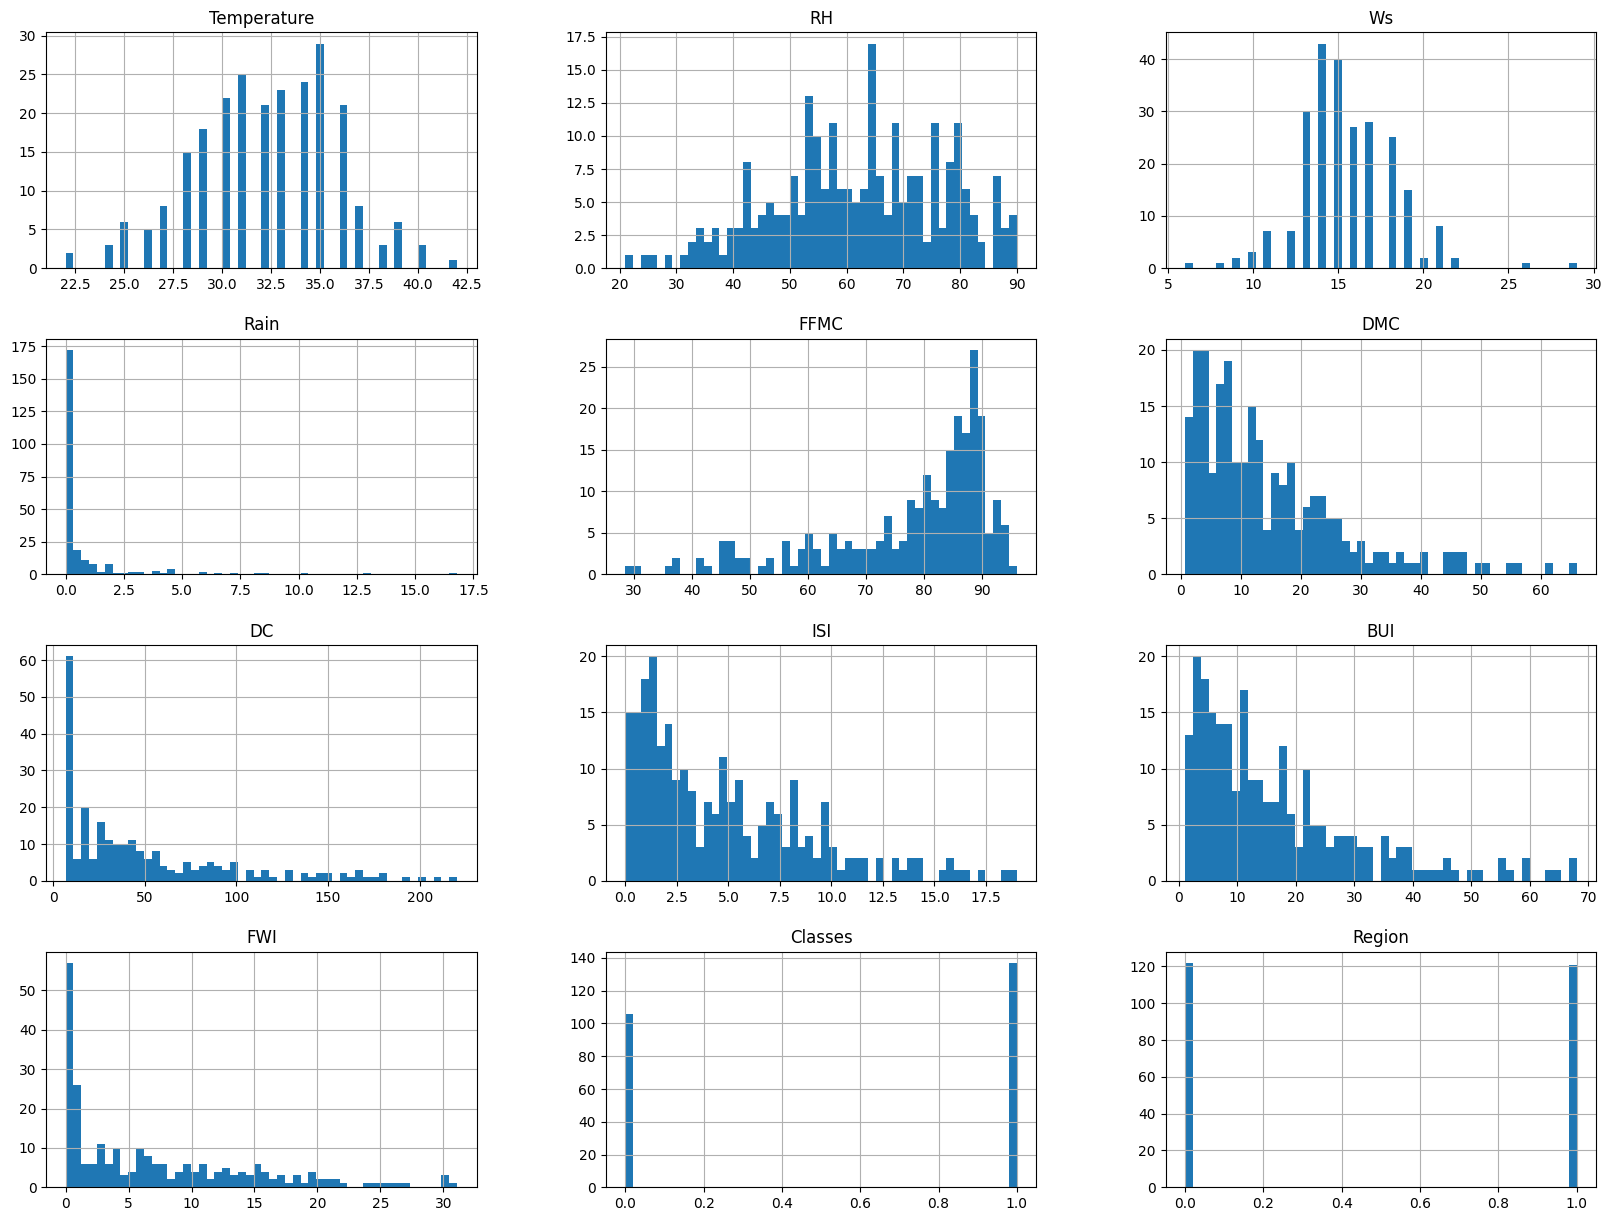

In [28]:
# plt.style.use('seaborn')
dfc.hist(bins=50,figsize=(20,15))
plt.show()

In [29]:
percent = dfc['Classes'].value_counts(normalize=True)*100

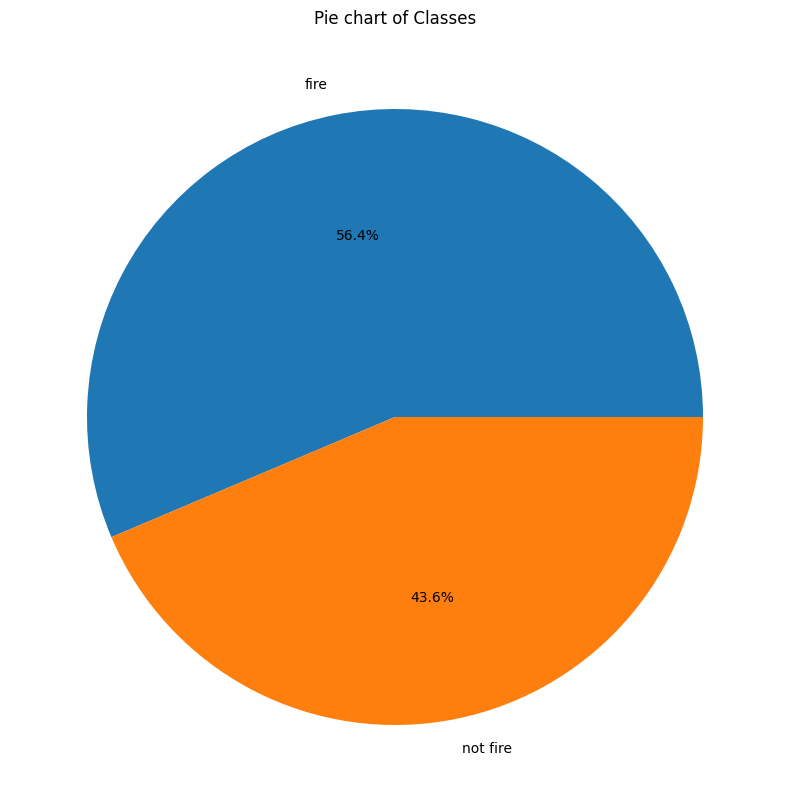

In [30]:
labels = ['fire', 'not fire']
plt.figure(figsize=(15,10))
plt.pie(percent, labels = labels, autopct = "%1.1f%%")
plt.title("Pie chart of Classes")
plt.show()

In [31]:
dfc.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


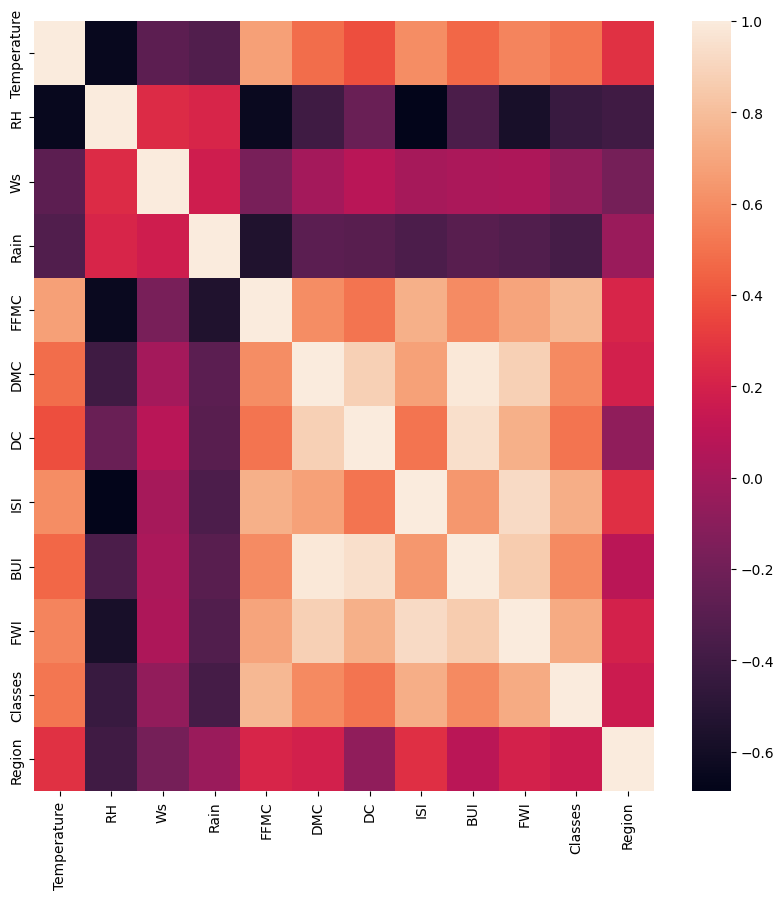

In [32]:
plt.figure(figsize=(10,10))
sns.heatmap(dfc.corr())
plt.show()

<Axes: ylabel='FWI'>

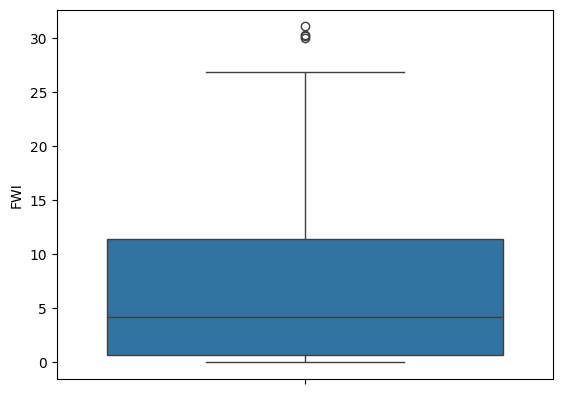

In [33]:
sns.boxplot(df['FWI'])

In [35]:
df = df.drop(['Unnamed: 0'],axis=1).reset_index(drop = True)
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [46]:
df['Classes'] = df['Classes'].str.strip().replace({'not fire':0, 'fire':1})

C:\Users\1938663\AppData\Local\Temp\ipykernel_17148\1790372290.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Classes'] = df['Classes'].str.strip().replace({'not fire':0, 'fire':1})


In [47]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [49]:
#lets do monthly fire analysis
df[df['Region'] == 1]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,0,1
123,2,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,0,1
124,3,6,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,0,1
125,4,6,2012,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0,0,1
126,5,6,2012,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1


In [ ]:
dftemp = df[df['Region']==1]

ValueError: Could not interpret value `month` for `x`. An entry with this name does not appear in `data`.

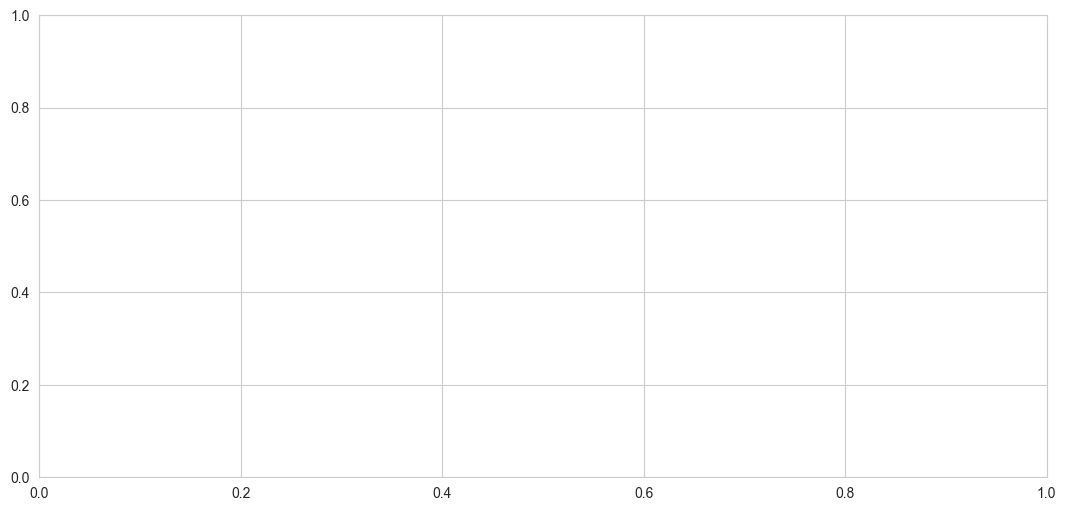

In [174]:
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x = 'month' , hue = 'Classes', data = df)
plt.title("Fire analysis month wise")

# Feature Engineering

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [55]:
df = pd.read_csv('forest_cleaned_dataset.csv')

TypeError: read_csv() got an unexpected keyword argument 'index'

In [56]:
df

,Unnamed: 0,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [59]:
df = df.drop(['Unnamed: 0'],axis = 1).reset_index(drop = True)

In [60]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [61]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [62]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [63]:
df.drop(['day','month','year'],axis = 1, inplace = True)

In [64]:
df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [65]:
df['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [66]:
df['Classes'] = np.where(df['Classes'].str.strip() == "not fire", 0 , 1)

In [67]:
df['Classes'].unique()

array([0, 1])

In [68]:

df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [69]:
x = df.drop('FWI',axis=1)
y = df['FWI']

In [70]:
x

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0
...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0,1


In [71]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [95]:
#train test split
from sklearn.model_selection import train_test_split

In [96]:
x_train, x_test, y_train, y_test = train_test_split(x , y, test_size=0.25, random_state = 52)

In [97]:
x_train.shape

(182, 11)

In [98]:
x_test.shape

(61, 11)

In [99]:
#Feature selection based on correlation
x_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.644464,-0.322346,-0.311594,0.639101,0.482042,0.378905,0.630570,0.457614,0.488951,0.218609
RH,-0.644464,1.000000,0.288462,0.162274,-0.609509,-0.400459,-0.233422,-0.671943,-0.350346,-0.384243,-0.380977
Ws,-0.322346,0.288462,1.000000,0.143318,-0.234144,-0.048984,0.041042,-0.027883,-0.016130,-0.086727,-0.193427
Rain,-0.311594,0.162274,0.143318,1.000000,-0.542714,-0.294891,-0.305221,-0.353735,-0.307338,-0.409604,0.048472
FFMC,0.639101,-0.609509,-0.234144,-0.542714,1.000000,0.593574,0.516696,0.737749,0.588451,0.763419,0.123391
DMC,0.482042,-0.400459,-0.048984,-0.294891,0.593574,1.000000,0.887272,0.679058,0.983172,0.572408,0.171453
DC,0.378905,-0.233422,0.041042,-0.305221,0.516696,0.887272,1.000000,0.529031,0.946365,0.522019,-0.107948
ISI,0.630570,-0.671943,-0.027883,-0.353735,0.737749,0.679058,0.529031,1.000000,0.650288,0.726843,0.198636
BUI,0.457614,-0.350346,-0.016130,-0.307338,0.588451,0.983172,0.946365,0.650288,1.000000,0.582605,0.063528
Classes,0.488951,-0.384243,-0.086727,-0.409604,0.763419,0.572408,0.522019,0.726843,0.582605,1.000000,0.055429


<Axes: >

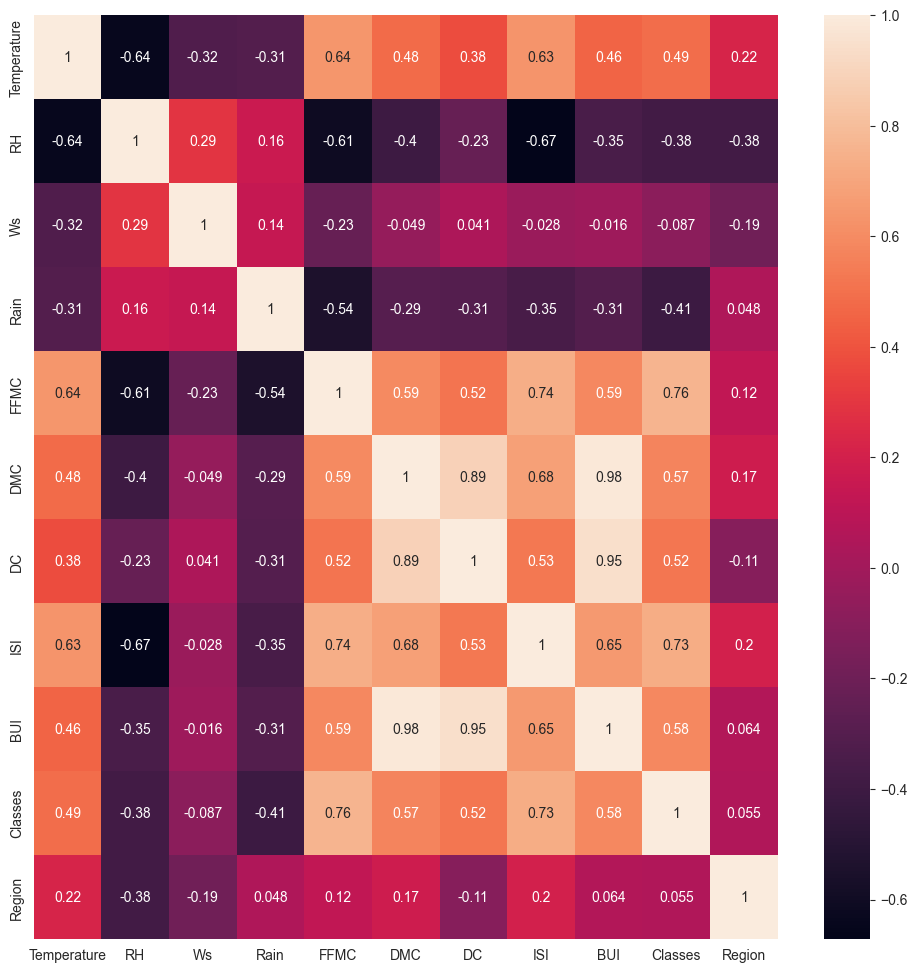

In [100]:
plt.figure(figsize=(12,12))
sns.heatmap(x_train.corr(),annot=True)

In [101]:
def correlation(data, threshold):
    cols = set()
    corr = data.corr()
    for i in range(len(corr.columns)):
        for j in range(i):
            if abs(corr.iloc[i,j] > threshold):
                col = corr.columns[i]
                cols.add(col)
    return cols

In [102]:
to_drop = correlation(x_train, 0.85)

In [103]:
x_train.drop(to_drop, axis=1,inplace=True)
x_test.drop(to_drop, axis=1, inplace=True)

In [104]:
x_train, x_test

(     Temperature  RH  Ws  Rain  FFMC   DMC   ISI  Classes  Region
 57            33  76  15   0.0  86.5  24.4   5.6        1       0
 193           39  21  17   0.4  93.0  18.4  15.5        1       1
 89            35  48  18   0.0  90.1  54.2  12.5        1       0
 40            33  76  14   0.0  81.1   8.1   2.6        0       0
 60            35  64  17   0.0  87.2  31.9   6.8        1       0
 ..           ...  ..  ..   ...   ...   ...   ...      ...     ...
 86            31  78  18   0.0  85.8  45.6   4.7        1       0
 151           34  42  15   1.7  79.7  12.0   2.2        0       1
 13            30  78  20   0.5  59.0   4.6   1.0        0       0
 11            26  81  19   0.0  84.0  13.8   4.8        1       0
 156           34  45  18   0.0  90.5  18.7  11.3        1       1
 
 [182 rows x 9 columns],
      Temperature  RH  Ws  Rain  FFMC   DMC   ISI  Classes  Region
 179           34  59  16   0.0  88.1  19.5   7.4        1       1
 142           32  55  14   0.0  86

In [105]:
from sklearn.preprocessing import StandardScaler

In [106]:
scaler = StandardScaler()

In [107]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [109]:
x_train_scaled, x_test_scaled

(array([[ 0.14678043,  0.94598806, -0.14363363, ...,  0.18912053,
          0.87577982, -1.        ],
        [ 1.85193176, -2.74576261,  0.55346824, ...,  2.57037405,
          0.87577982,  1.        ],
        [ 0.7151642 , -0.93344865,  0.90201917, ...,  1.84878208,
          0.87577982, -1.        ],
        ...,
        [-0.70579524,  1.08023354,  1.59912103, ..., -0.91732049,
         -1.14183951, -1.        ],
        [-1.84256279,  1.28160176,  1.2505701 , ..., -0.00330399,
          0.87577982, -1.        ],
        [ 0.43097231, -1.13481686,  0.90201917, ...,  1.56014529,
          0.87577982,  1.        ]]),
 array([[ 4.30972314e-01, -1.95098512e-01,  2.04917306e-01,
         -3.94099757e-01,  7.09376274e-01,  3.08480038e-01,
          6.22075719e-01,  8.75779819e-01,  1.00000000e+00],
        [-1.37411463e-01, -4.63589469e-01, -4.92184557e-01,
         -3.94099757e-01,  5.65807085e-01, -5.49372226e-01,
          4.48021391e-02,  8.75779819e-01,  1.00000000e+00],
        [ 7

<Axes: >

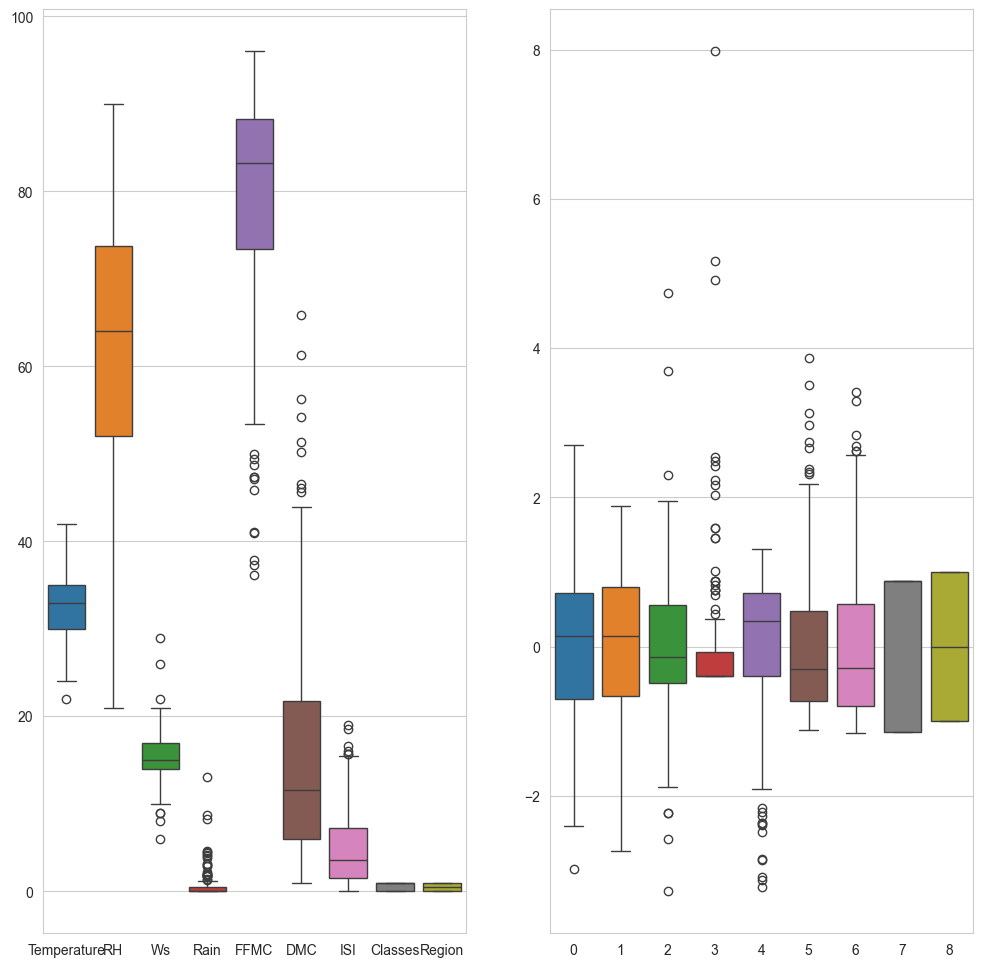

In [111]:
plt.figure(figsize=(12,12))
plt.subplot(1,2,1)
sns.boxplot(data = x_train)
plt.subplot(1,2,2)
sns.boxplot(data = x_train_scaled)

# Linear Regression model

In [114]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [115]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [116]:
y_pred

array([10.76090884,  4.85588499, 13.66403013, 21.23337299,  1.42714864,
        2.42958383, -0.21577257,  0.19296778,  0.12322763,  3.3250398 ,
        1.62256247, -0.25349972,  6.50755005,  0.66669174, 24.43290834,
        2.84028263, -0.59051424,  8.05633665,  1.30340614, 13.57080025,
       14.47301914,  1.96375386,  0.38818133,  0.13053903, -0.05182695,
        5.92800914, 12.62368622,  4.85684109,  0.99248011, 15.8583286 ,
        5.50712189,  6.40888731, 15.3499904 , -1.19512955,  7.11104013,
        7.34671999,  8.20706435,  1.05027087, 10.12505684, -0.32679661,
       -0.19308025,  9.45814485, 15.42289583,  3.16309458,  4.62721544,
       -0.72433706, 16.4073655 ,  8.91313512, 14.34329415, 13.10483993,
        8.36671944, 18.84478759, 17.35576062,  1.87867547,  0.45475149,
        3.93648732,  0.16095629, -0.14942804,  9.82670951,  3.390841  ,
       -0.68318624])

In [117]:
mae

0.6631799862302002

In [118]:
r2

0.9774564704107603

In [131]:
x_train_scaled

array([[ 0.14678043,  0.94598806, -0.14363363, ...,  0.18912053,
         0.87577982, -1.        ],
       [ 1.85193176, -2.74576261,  0.55346824, ...,  2.57037405,
         0.87577982,  1.        ],
       [ 0.7151642 , -0.93344865,  0.90201917, ...,  1.84878208,
         0.87577982, -1.        ],
       ...,
       [-0.70579524,  1.08023354,  1.59912103, ..., -0.91732049,
        -1.14183951, -1.        ],
       [-1.84256279,  1.28160176,  1.2505701 , ..., -0.00330399,
         0.87577982, -1.        ],
       [ 0.43097231, -1.13481686,  0.90201917, ...,  1.56014529,
         0.87577982,  1.        ]])

In [140]:
regressor1 = LinearRegression()
regressor1.fit(x_train_scaled, y_train)
y_preds = regressor1.predict(x_test_scaled)
maes = mean_absolute_error(y_test, y_pred)
r2s = r2_score(y_test, y_pred)

In [141]:
maes

0.6631799862302012

In [142]:
r2s

0.9774564704107603

In [143]:
y_preds

array([10.76090884,  4.85588499, 13.66403013, 21.23337299,  1.42714864,
        2.42958383, -0.21577257,  0.19296778,  0.12322763,  3.3250398 ,
        1.62256247, -0.25349972,  6.50755005,  0.66669174, 24.43290834,
        2.84028263, -0.59051424,  8.05633665,  1.30340614, 13.57080025,
       14.47301914,  1.96375386,  0.38818133,  0.13053903, -0.05182695,
        5.92800914, 12.62368622,  4.85684109,  0.99248011, 15.8583286 ,
        5.50712189,  6.40888731, 15.3499904 , -1.19512955,  7.11104013,
        7.34671999,  8.20706435,  1.05027087, 10.12505684, -0.32679661,
       -0.19308025,  9.45814485, 15.42289583,  3.16309458,  4.62721544,
       -0.72433706, 16.4073655 ,  8.91313512, 14.34329415, 13.10483993,
        8.36671944, 18.84478759, 17.35576062,  1.87867547,  0.45475149,
        3.93648732,  0.16095629, -0.14942804,  9.82670951,  3.390841  ,
       -0.68318624])

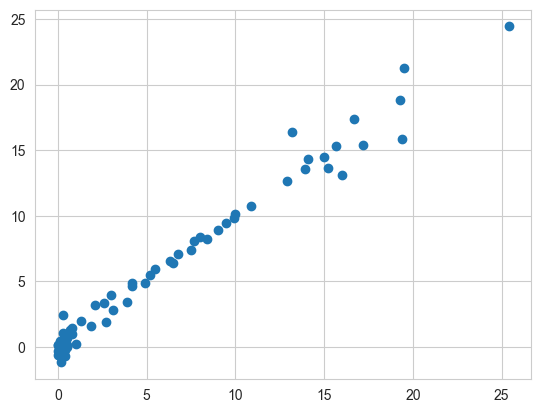

In [144]:
plt.scatter(y_test,y_pred)

r2  = 0.9619062906025313
mae = 0.915888607131529


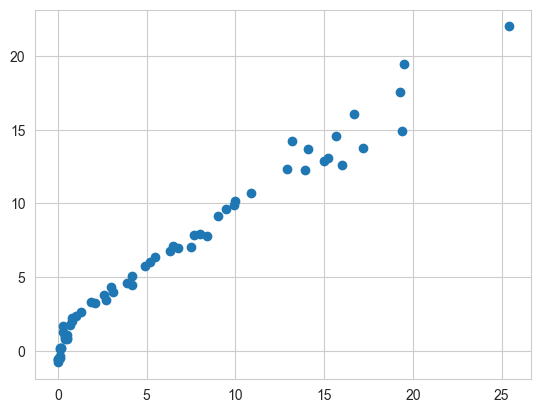

In [148]:
#Lasso Regression
from sklearn.linear_model import Lasso
regressor = Lasso()
regressor.fit(x_train_scaled, y_train)
y_pred = regressor.predict(x_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("r2  =",r2)
print("mae =",mae)
plt.scatter(y_test,y_pred)

r2  = 0.9770051440561155
mae = 0.6723134298476842


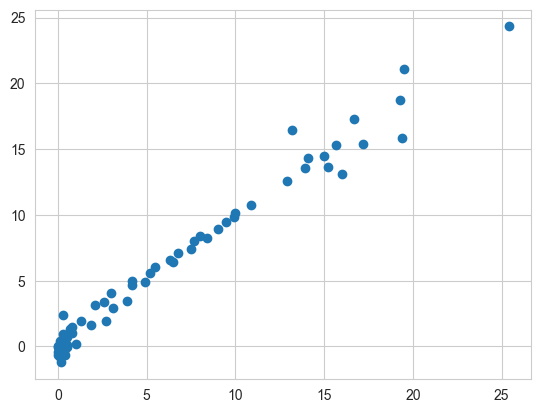

In [149]:
from sklearn.linear_model import Ridge
regressor = Ridge()
regressor.fit(x_train_scaled, y_train)
y_pred = regressor.predict(x_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("r2  =",r2)
print("mae =",mae)
plt.scatter(y_test,y_pred)

r2  = 0.8986879554007856
mae = 1.5985549894981457


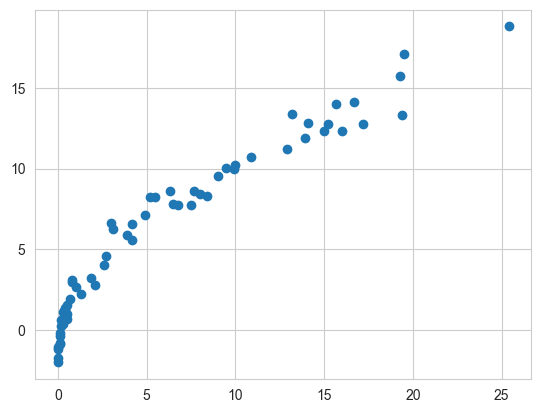

In [150]:
from sklearn.linear_model import ElasticNet
regressor = ElasticNet()
regressor.fit(x_train_scaled, y_train)
y_pred = regressor.predict(x_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("r2  =",r2)
print("mae =",mae)
plt.scatter(y_test,y_pred)

In [162]:
from sklearn.linear_model import LassoCV
lcv = LassoCV()

In [163]:
lcv.fit(x_train_scaled,y_train)
lcv.alpha_


np.float64(0.03267948551215335)

In [164]:
dir(lcv)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__sklearn_tags__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_build_request_for_signature',
 '_check_feature_names',
 '_check_n_features',
 '_decision_function',
 '_doc_link_module',
 '_doc_link_template',
 '_doc_link_url_param_generator',
 '_estimator_type',
 '_get_default_requests',
 '_get_doc_link',
 '_get_estimator',
 '_get_metadata_request',
 '_get_param_names',
 '_get_tags',
 '_is_multitask',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_set_intercept',
 '_validate_data',

In [168]:
lcv.alpha_

np.float64(0.03267948551215335)

In [166]:
len(lcv.mse_path_)

100

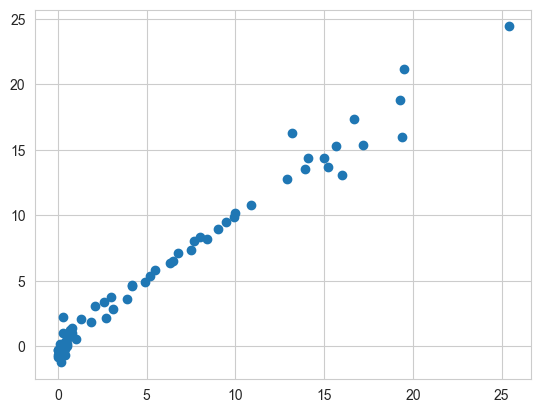

In [169]:
plt.scatter(y_test, lcv.predict(x_test_scaled))

r2  = 0.9770051440561072
mae = 0.6723134298477229


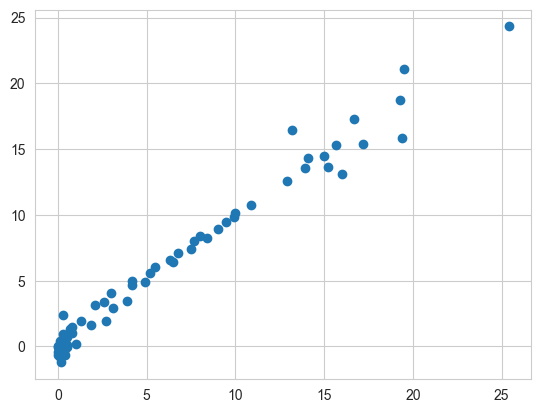

In [170]:
from sklearn.linear_model import RidgeCV
regressor = RidgeCV()
regressor.fit(x_train_scaled, y_train)
y_pred = regressor.predict(x_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("r2  =",r2)
print("mae =",mae)
plt.scatter(y_test,y_pred)

r2  = 0.9772638201493846
mae = 0.6813598657275358


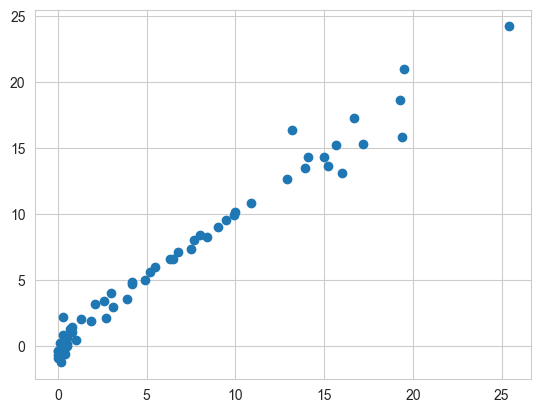

In [172]:
from sklearn.linear_model import ElasticNetCV
regressor = ElasticNetCV(l1_ratio=0.7)
regressor.fit(x_train_scaled, y_train)
y_pred = regressor.predict(x_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("r2  =",r2)
print("mae =",mae)
plt.scatter(y_test,y_pred)